In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

In [ ]:
normal_df = pd.read_csv("../data/WADI_14days_new.csv", index_col=0)
attack_df = pd.read_csv("../data/WADI_attackdataLABLE.csv", index_col=0)
attack_df.columns = attack_df.iloc[0]  # Use the first row as header
attack_df = attack_df[1:]
attack_df = attack_df.reset_index(drop=True)
normal_df = normal_df.reset_index(drop=True)

/tmp/ipykernel_35/2093216043.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  attack_df = pd.read_csv("/kaggle/input/wadi-data/WADI_attackdataLABLE.csv", index_col=0)


In [75]:
normal_df

,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,9/25/2017,00:00.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
1,9/25/2017,00:01.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
2,9/25/2017,00:02.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
3,9/25/2017,00:03.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
4,9/25/2017,00:04.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784566,10/7/17,16:06.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784567,10/7/17,16:07.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784568,10/7/17,16:08.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784569,10/7/17,16:09.0,175.896,0.613476,11.8913,479.224,0.331622,0.001173,0,0,...,1,1,1,1,1,1,1,60.4477,1,0.25


In [76]:
attack_df.isna().sum().sort_values()

Row 
Attack LABLE (1:No Attack, -1:Attack)         0
2_MV_201_STATUS                               2
2_SV_101_STATUS                               2
2_PIT_003_PV                                  2
2_PIT_002_PV                                  2
                                          ...  
2_FQ_401_PV                                   2
2_P_002_STATUS                           172803
2_P_001_STATUS                           172803
2_LS_002_AL                              172803
2_LS_001_AL                              172803
Length: 130, dtype: int64

In [77]:
normal_df.isna().sum().sort_values(ascending=False)[:20]

2_LS_001_AL        784571
2_LS_002_AL        784571
2_P_002_STATUS     784571
2_P_001_STATUS     784571
1_AIT_002_PV           12
2B_AIT_004_PV          10
3_AIT_004_PV            6
1_AIT_004_PV            6
2_MV_201_STATUS         0
2_MV_301_STATUS         0
2_MV_401_STATUS         0
2_MV_501_STATUS         0
2_MV_101_STATUS         0
2_P_003_SPEED           0
2_P_003_STATUS          0
2_P_004_SPEED           0
2_P_004_STATUS          0
2_PIC_003_CO            0
2_PIC_003_SP            0
2_MV_601_STATUS         0
dtype: int64

In [78]:
null_cols = ['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS']
normal_df.drop(null_cols, axis=1, inplace=True)
attack_df.drop(null_cols, axis=1, inplace=True)

In [79]:
attack_df.dropna(axis=0, inplace=True)

In [80]:
normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']] = normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']].fillna(method='bfill')

/tmp/ipykernel_35/2759473663.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']] = normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']].fillna(method='bfill')


In [81]:
train_cols = normal_df.columns.drop(['Date','Time'])
normal_df[train_cols] = normal_df[train_cols].astype(float)
attack_df[train_cols] = attack_df[train_cols].astype(float)

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
normal_df_scaled = scaler.fit_transform(normal_df[train_cols])
attack_df_scaled = scaler.transform(attack_df[train_cols])

normal_df_scaled = pd.DataFrame(normal_df_scaled, columns=train_cols)
attack_df_scaled = pd.DataFrame(attack_df_scaled, columns=train_cols)

label = attack_df[attack_df.columns[-1]]
label = label.astype(int)

In [ ]:
# normal_df_scaled.drop(['2B_AIT_002_PV'], axis=1, inplace=True)
# attack_df_scaled.drop(['2B_AIT_002_PV'], axis=1, inplace=True)

In [84]:
train_cols = normal_df_scaled.columns

In [85]:
def create_windows(df, window_size=30, step_size=30):
    windows = []
    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        windows.append(df.iloc[start:end].values)
    return np.array(windows)

In [86]:
WINDOW_SIZE = 60
WINDOW_STEP = 10

attack_windows = create_windows(attack_df_scaled, WINDOW_SIZE, step_size=WINDOW_STEP)
normal_windows = create_windows(normal_df_scaled, WINDOW_SIZE, step_size=WINDOW_STEP)

In [87]:
print(f"Normal windows shape: {normal_windows.shape}")
print(f"Attack windows shape: {attack_windows.shape}")

Normal windows shape: (78452, 60, 122)
Attack windows shape: (17275, 60, 122)


In [88]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential

In [89]:
class Generator(Model):
    def __init__(self, hidden_units, num_signals, num_lstm_layers, dropout, learn_scale=True):
        super().__init__()
        # Custom initializers if provided
        kernel_init = tf.keras.initializers.TruncatedNormal()
        bias_init = tf.keras.initializers.TruncatedNormal()
        scale_init = tf.keras.initializers.Constant(1.0)
        lstm_kernel_init = 'glorot_uniform'
        lstm_bias_init = 'zeros'

        self.lstm = tf.keras.Sequential([
            tf.keras.layers.LSTM(
                hidden_units,
                return_sequences=True,
                kernel_initializer=lstm_kernel_init,
                bias_initializer=lstm_bias_init,
                dropout=dropout,
                name=f"LSTM_{i}"
            ) for i in range(num_lstm_layers)
        ])

        self.dense = layers.Dense(
            num_signals,
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
            name='dense'
        )
        if learn_scale:
            self.scale = tf.Variable(initial_value=scale_init(shape=(1,)), trainable=True, name='scale_out_G')
        else:
            self.scale = tf.constant(1.0, shape=(1,))

    def call(self, z, training=False):
        x = self.lstm(z, training=training)
        logits = self.dense(x)
        output = tf.nn.tanh(logits) * self.scale
        return output

In [90]:
class Discriminator(tf.keras.Model):
    def __init__(self, hidden_units, num_lstm_layers=1, dropout=0.0, add_batch_mean=False, **kwargs):
        super().__init__(**kwargs)
        self.add_batch_mean = add_batch_mean

        kernel_init = tf.keras.initializers.TruncatedNormal()
        bias_init = tf.keras.initializers.TruncatedNormal()

        self.lstm = tf.keras.Sequential([
            tf.keras.layers.LSTM(
                hidden_units,
                return_sequences=True if i<num_lstm_layers-1 else False,
                dropout=dropout,
                name=f"LSTM_{i}"
            ) for i in range(num_lstm_layers)
        ])
        self.linear = tf.keras.layers.Dense(
            1,
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
            name="dense"
        )

    def call(self, x, training=True):
        if self.add_batch_mean:
            batch_mean = tf.reduce_mean(x, axis=0, keepdims=True)
            batch_mean = tf.repeat(batch_mean, repeats=tf.shape(x)[0], axis=0)
            x = tf.concat([x, batch_mean], axis=-1)
        output = self.lstm(x, training=training)
        logits = self.linear(output)
        prob = tf.nn.sigmoid(logits)
        return prob

In [91]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output, noise=0.1):
    real_loss = cross_entropy(tf.ones_like(real_output)-noise*tf.random.uniform(tf.shape(real_output)), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output)+noise*tf.random.uniform(tf.shape(fake_output)), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [92]:
class MADGAN(tf.keras.Model):
    def __init__(self, generator, discriminator, noise=0.1, **kwargs):
        super(MADGAN, self).__init__(**kwargs)
        self.generator = generator
        self.discriminator = discriminator
        self.gen_loss_metric = tf.keras.metrics.Mean(name='gen_loss')
        self.disc_loss_metric = tf.keras.metrics.Mean(name='disc_loss')
        self.accuracy_metric = tf.keras.metrics.BinaryAccuracy (name='accuracy')
        self.noise = noise

    def call(self, inputs, training=False):
        generated_data = self.generator(inputs, training=training)
        disc_output = self.discriminator(generated_data, training=training)
        return generated_data, disc_output

    def compile(self, gen_optimizer, disc_optimizer, **kwargs):
        super(MADGAN, self).compile(**kwargs)
        self.gen_optimizer = gen_optimizer
        self.disc_optimizer = disc_optimizer
    
    @property
    def metrics(self):
        return [self.gen_loss_metric, self.disc_loss_metric, self.accuracy_metric]
    
    def train_step(self, data):
        real_data = data
        batch_size = tf.shape(real_data)[0]

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
            generated_data = self.generator(noise, training=True)
            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)
            disc_loss = discriminator_loss(real_output, fake_output, self.noise)
            preds = tf.concat([fake_output, real_output], axis=0)
            labels = tf.concat([tf.zeros_like(fake_output), tf.ones_like(real_output)], axis=0)

        disc_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.disc_optimizer.apply_gradients(zip(disc_gradients, self.discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
            generated_data = self.generator(noise, training=True)
            fake_output = self.discriminator(generated_data, training=True)
            gen_loss = generator_loss(fake_output)

        gen_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.generator.trainable_variables))

        # Update metrics
        self.gen_loss_metric.update_state(gen_loss)
        self.disc_loss_metric.update_state(disc_loss)
        self.accuracy_metric.update_state(labels, preds)

        return {
            "disc_loss": self.disc_loss_metric.result(),
            "gen_loss": self.gen_loss_metric.result(),
            "accuracy": self.accuracy_metric.result()
        }
    
    def test_step(self, data):
        real_data = data
        batch_size = tf.shape(real_data)[0]

        noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
        generated_data = self.generator(noise, training=False)
        real_output = self.discriminator(real_data, training=False)
        fake_output = self.discriminator(generated_data, training=False)
        preds = tf.concat([fake_output, real_output], axis=0)
        labels = tf.concat([tf.zeros_like(fake_output), tf.ones_like(real_output)], axis=0)

        disc_loss = discriminator_loss(real_output, fake_output, self.noise)
        gen_loss = generator_loss(fake_output)

        self.gen_loss_metric.update_state(gen_loss)
        self.disc_loss_metric.update_state(disc_loss)
        self.accuracy_metric.update_state(labels, preds)

        return {
            "disc_loss": self.disc_loss_metric.result(),
            "gen_loss": self.gen_loss_metric.result(),
            "accuracy": self.accuracy_metric.result()
        }

In [214]:
HIDDEN_UNITS = 100
NUM_LSTM_LAYERS_GEN = 3
NUM_LSTM_LAYERS_DISC = 1
DROPOUT = 0.1
LATENT_DIM = 30
NUM_SIGNALS = len(train_cols)
LEARN_SCALE = True

gen_config = {
    'hidden_units': 100,
    'num_signals': len(train_cols),
    'num_lstm_layers': 3,
    'dropout': 0.0,
    'learn_scale': True
}

generator = Generator(**gen_config)

disc_config = {
    'hidden_units': 100,
    'num_lstm_layers': 1,
    'dropout': 0.1,
    'add_batch_mean': True
}


discriminator = Discriminator(**disc_config)

generator.build(input_shape=(None, WINDOW_SIZE, LATENT_DIM))
discriminator.build(input_shape=(None, WINDOW_SIZE, len(train_cols)))

dummy_input_gen = tf.random.normal((1, WINDOW_SIZE, LATENT_DIM))
gen_output = generator(dummy_input_gen)

dummy_input_disc = tf.random.normal((1, WINDOW_SIZE, len(train_cols)))
disc_output = discriminator(dummy_input_disc)

print(gen_output.shape)
print(disc_output.shape)

(1, 60, 122)
(1, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'generator_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'discriminator_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [215]:
class Visualization(tf.keras.callbacks.Callback):
    def __init__(self, generator, num_samples=5):
        super(Visualization, self).__init__()
        self.generator = generator
        self.num_samples = num_samples

    def on_epoch_end(self, epoch, logs=None):
        noise = tf.random.normal((self.num_samples, WINDOW_SIZE, LATENT_DIM))
        generated_data = self.generator(noise, training=False)
        if (epoch+1) % 10 == 0:
            random_idx = np.random.randint(0, noise.shape[0])
            generated = self.generator(tf.expand_dims(noise[random_idx], axis=0), training=False)[0]
            sample_to_invert = normal_windows[random_idx]
            fig, ax = plt.subplots(10, 1, figsize=(10, 20))

            time = np.arange(WINDOW_SIZE)
            random_attr = np.random.choice([i for i in range (len(train_cols))], size=10, replace=False)
            # Plot data on each subplot
            for i in range (10):
                ax[i].plot(time, sample_to_invert[:, random_attr[i]], label=f"Real Attr {train_cols[random_attr[i]]}")
                ax[i].plot(time, generated[:, random_attr[i]], label=f"Generated Attr {train_cols[random_attr[i]]}")
                ax[i].legend(loc='upper right')
            plt.tight_layout()
            plt.show()

visualization = Visualization(generator, 5)

In [216]:
def save_weights_model(model, save_path):
    model.generator.save_weights(f'{save_path}/generator.weights.h5')
    model.discriminator.save_weights(f'{save_path}/discriminator.weights.h5')

def load_weights_model(model, save_path):
    model.generator.load_weights(f'{save_path}/generator.weights.h5')
    model.discriminator.load_weights(f'{save_path}/discriminator.weights.h5')
    return model

In [ ]:
BATCH_SIZE = 512
EPOCHS = 60
NOISE = 0.0
save_path = '../weights/MADGAN/'

madgan = MADGAN(generator, discriminator, NOISE)
madgan.compile(
    gen_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9),
    disc_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)
)
load_weights_model(madgan, save_path)
# Prepare training data
train_data = np.array(normal_windows)
# Train the model

Epoch 1/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.5969 - disc_loss: 1.0720 - gen_loss: 0.6563
Epoch 2/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9807 - disc_loss: 0.4364 - gen_loss: 1.4958
Epoch 3/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5066 - disc_loss: 1.5597 - gen_loss: 0.4949
Epoch 4/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.4468 - disc_loss: 1.3989 - gen_loss: 0.7202
Epoch 5/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6434 - disc_loss: 1.1371 - gen_loss: 1.2077
Epoch 6/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 0.0193 - gen_loss: 4.8840
Epoch 7/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 0.0020 - gen_loss: 7.2238
Epoch 8/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 1.7906e-04 - gen_loss: 9.6027
Epoch 9/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 1.9559e-05 - g

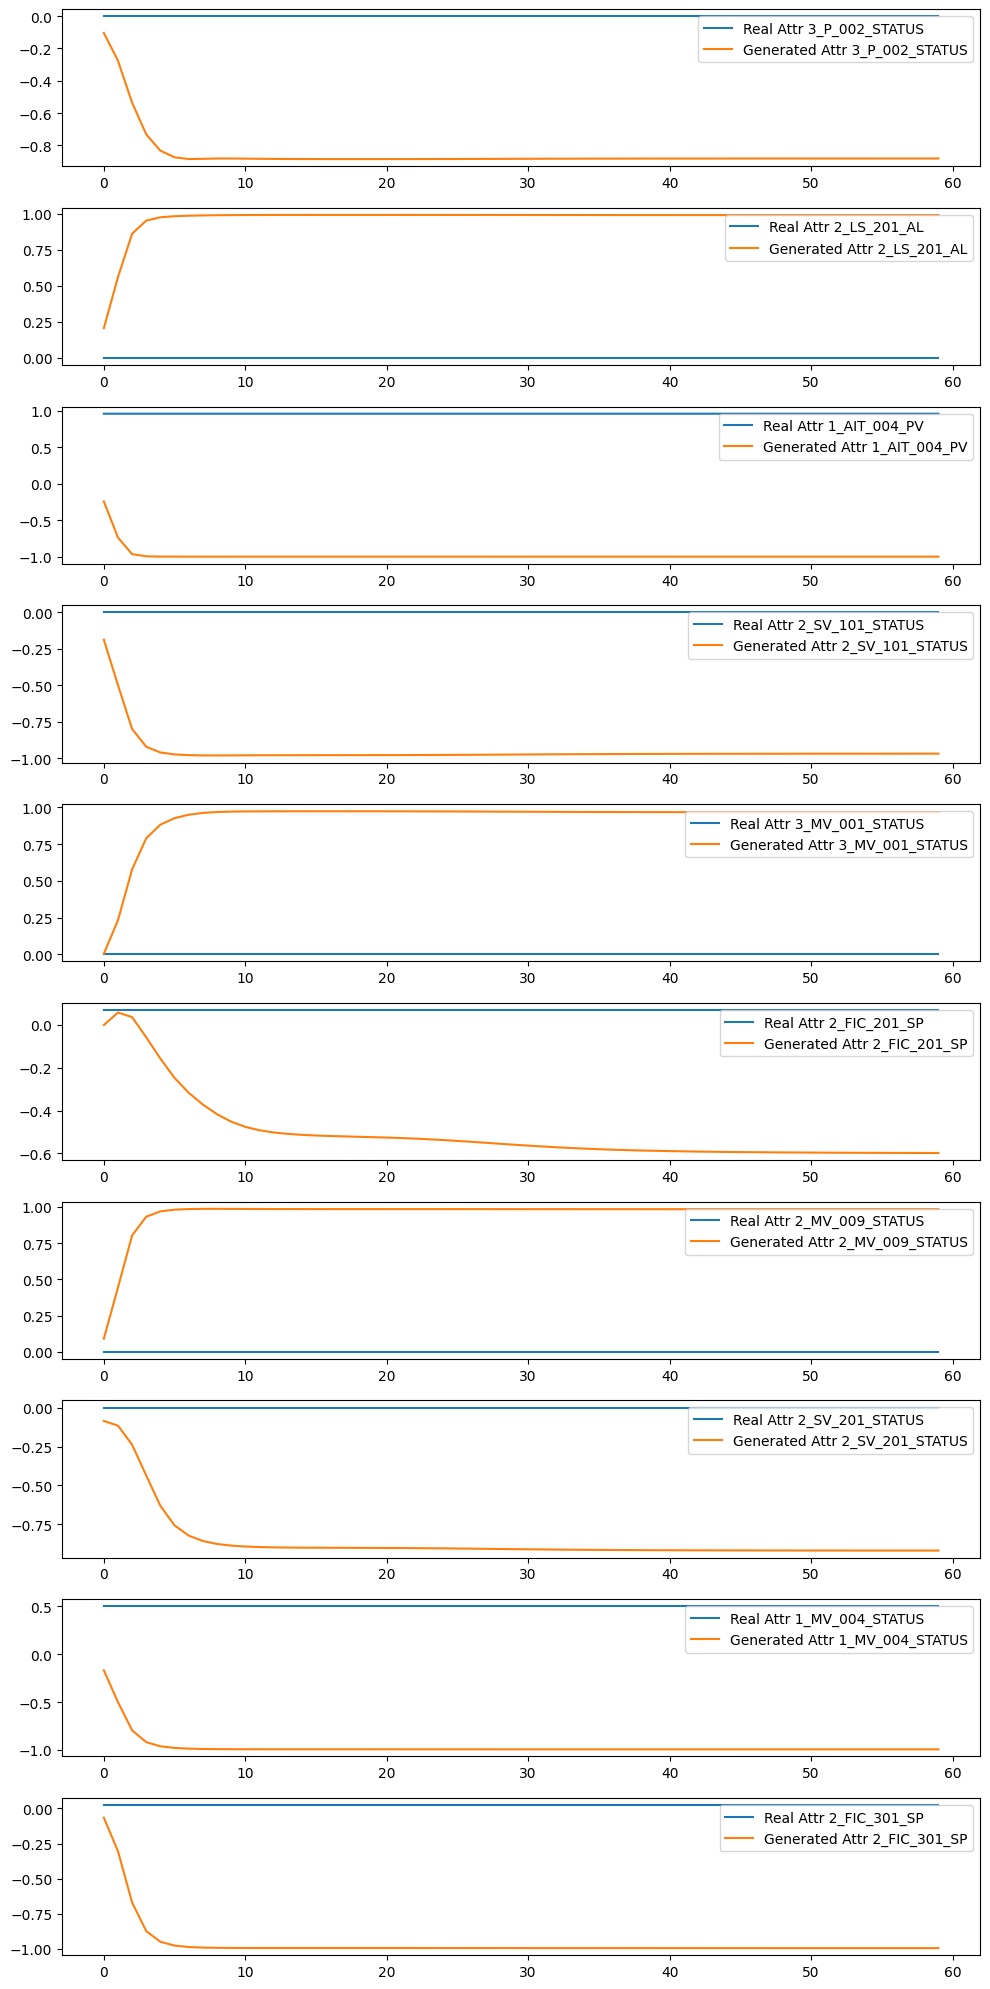

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 1.0000 - disc_loss: 1.9054e-06 - gen_loss: 14.0579
Epoch 11/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 3.4632e-07 - gen_loss: 15.6175
Epoch 12/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 1.0000 - disc_loss: 6.2818e-04 - gen_loss: 15.6578
Epoch 13/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9957 - disc_loss: 0.1011 - gen_loss: 12.3929
Epoch 14/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9915 - disc_loss: 0.2729 - gen_loss: 13.8730
Epoch 15/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8124 - disc_loss: 4.2274 - gen_loss: 5.3543
Epoch 16/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7952 - disc_loss: 1.5528 - gen_loss: 2.4084
Epoch 17/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6182 - disc_loss: 1.6206 - gen_loss: 1.2283
Epoch 18/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8866 - disc_loss: 0.81

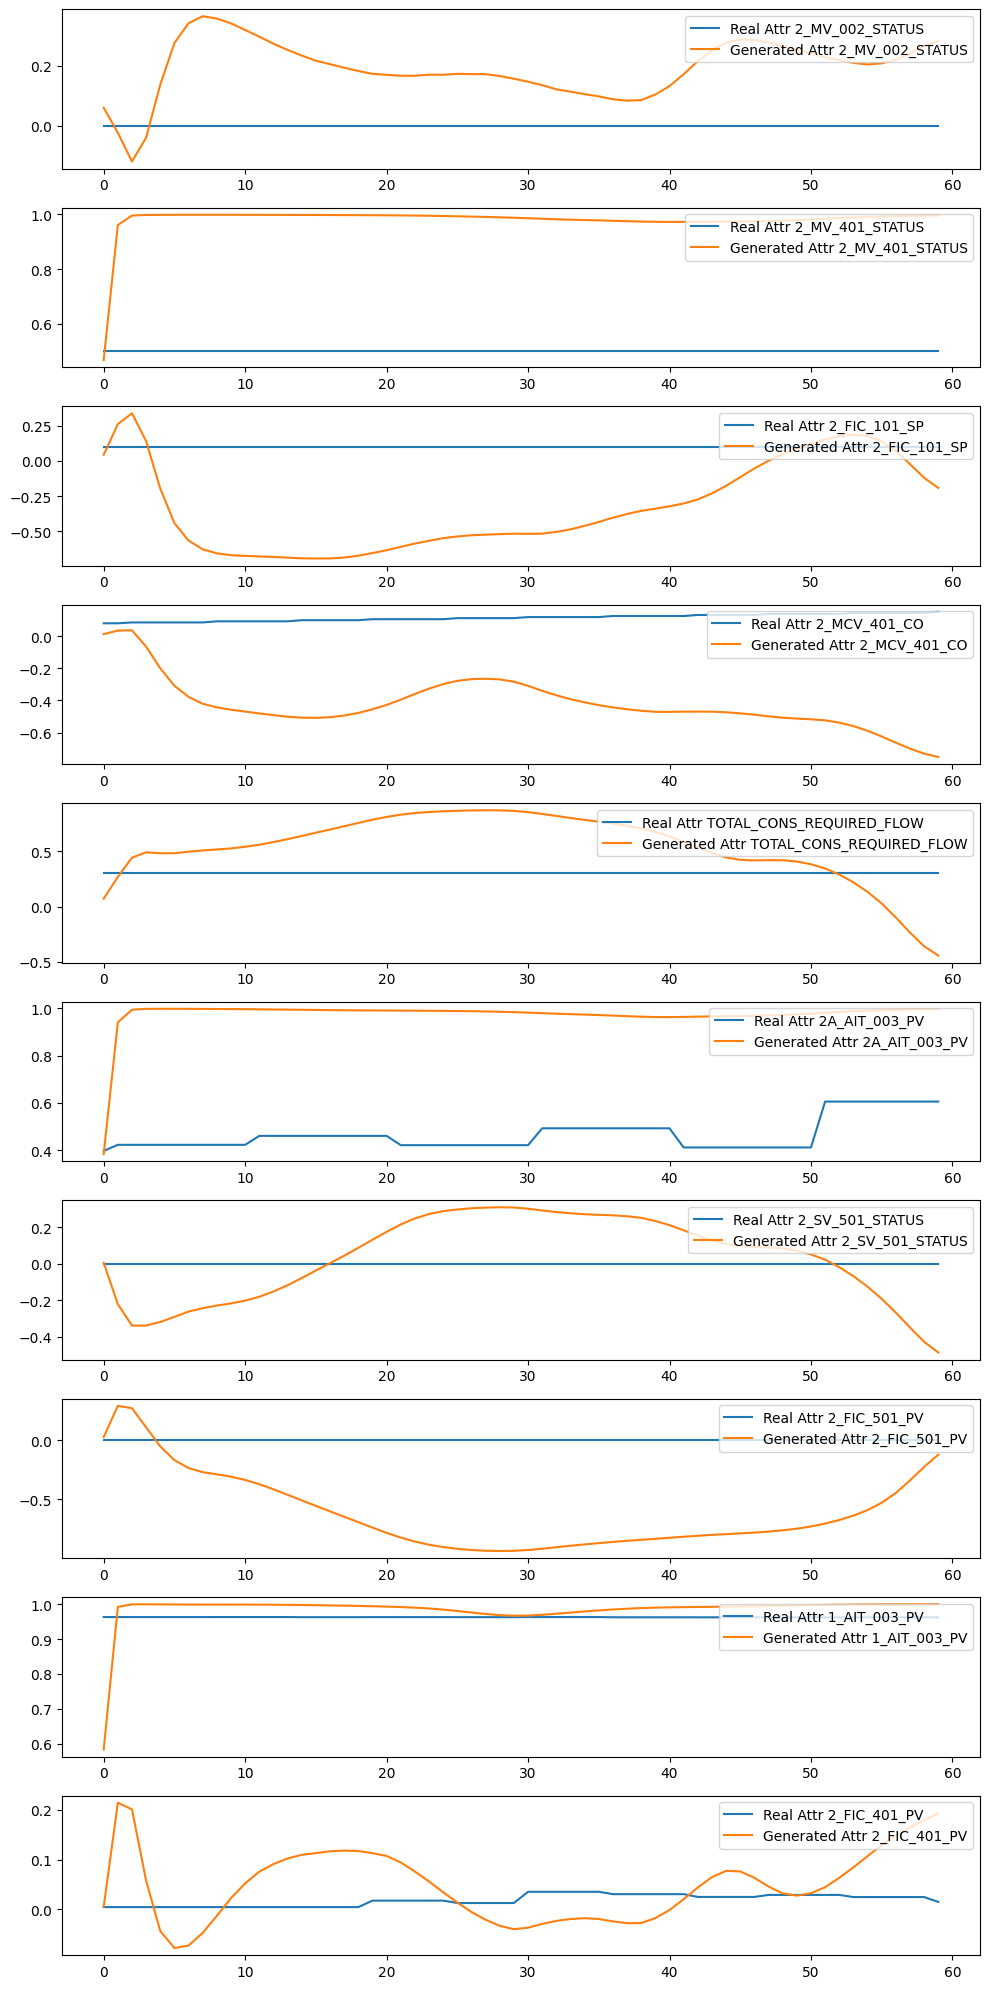

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.9982 - disc_loss: 0.0690 - gen_loss: 3.3970
Epoch 21/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9520 - disc_loss: 0.5355 - gen_loss: 5.1469
Epoch 22/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9512 - disc_loss: 0.4990 - gen_loss: 3.3473
Epoch 23/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9837 - disc_loss: 0.1670 - gen_loss: 4.6902
Epoch 24/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9559 - disc_loss: 0.3647 - gen_loss: 3.0843
Epoch 25/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9927 - disc_loss: 0.0914 - gen_loss: 3.9764
Epoch 26/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9770 - disc_loss: 0.2357 - gen_loss: 4.3431
Epoch 27/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9915 - disc_loss: 0.1068 - gen_loss: 3.9126
Epoch 28/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9937 - disc_loss: 0.0786 - gen_loss: 5.

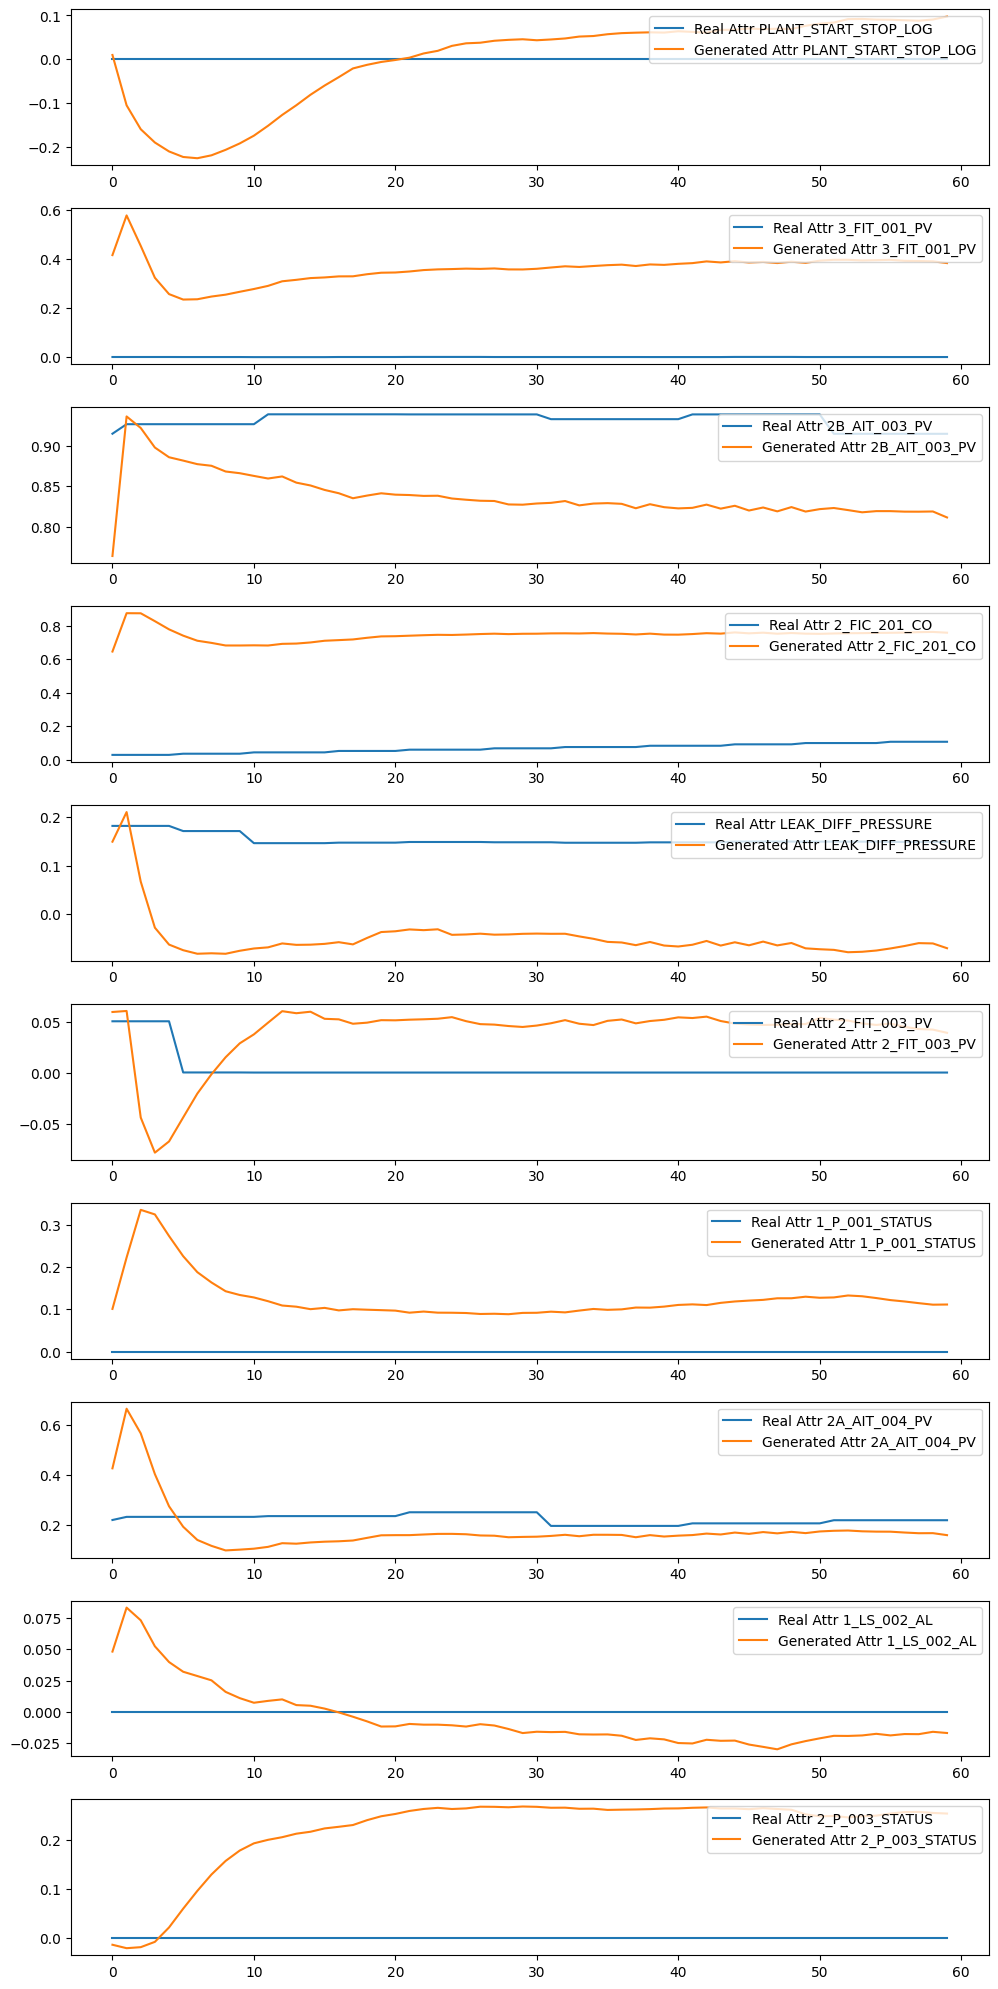

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6010 - disc_loss: 1.2954 - gen_loss: 1.2518
Epoch 31/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8529 - disc_loss: 0.6982 - gen_loss: 2.1249
Epoch 32/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9135 - disc_loss: 0.5067 - gen_loss: 2.6962
Epoch 33/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6876 - disc_loss: 1.2309 - gen_loss: 1.4973
Epoch 34/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7999 - disc_loss: 0.8888 - gen_loss: 1.6351
Epoch 35/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7777 - disc_loss: 1.0108 - gen_loss: 1.6667
Epoch 36/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8011 - disc_loss: 0.9220 - gen_loss: 1.7769
Epoch 37/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8141 - disc_loss: 0.8383 - gen_loss: 1.7735
Epoch 38/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8309 - disc_loss: 0.8153 - gen_loss: 1.

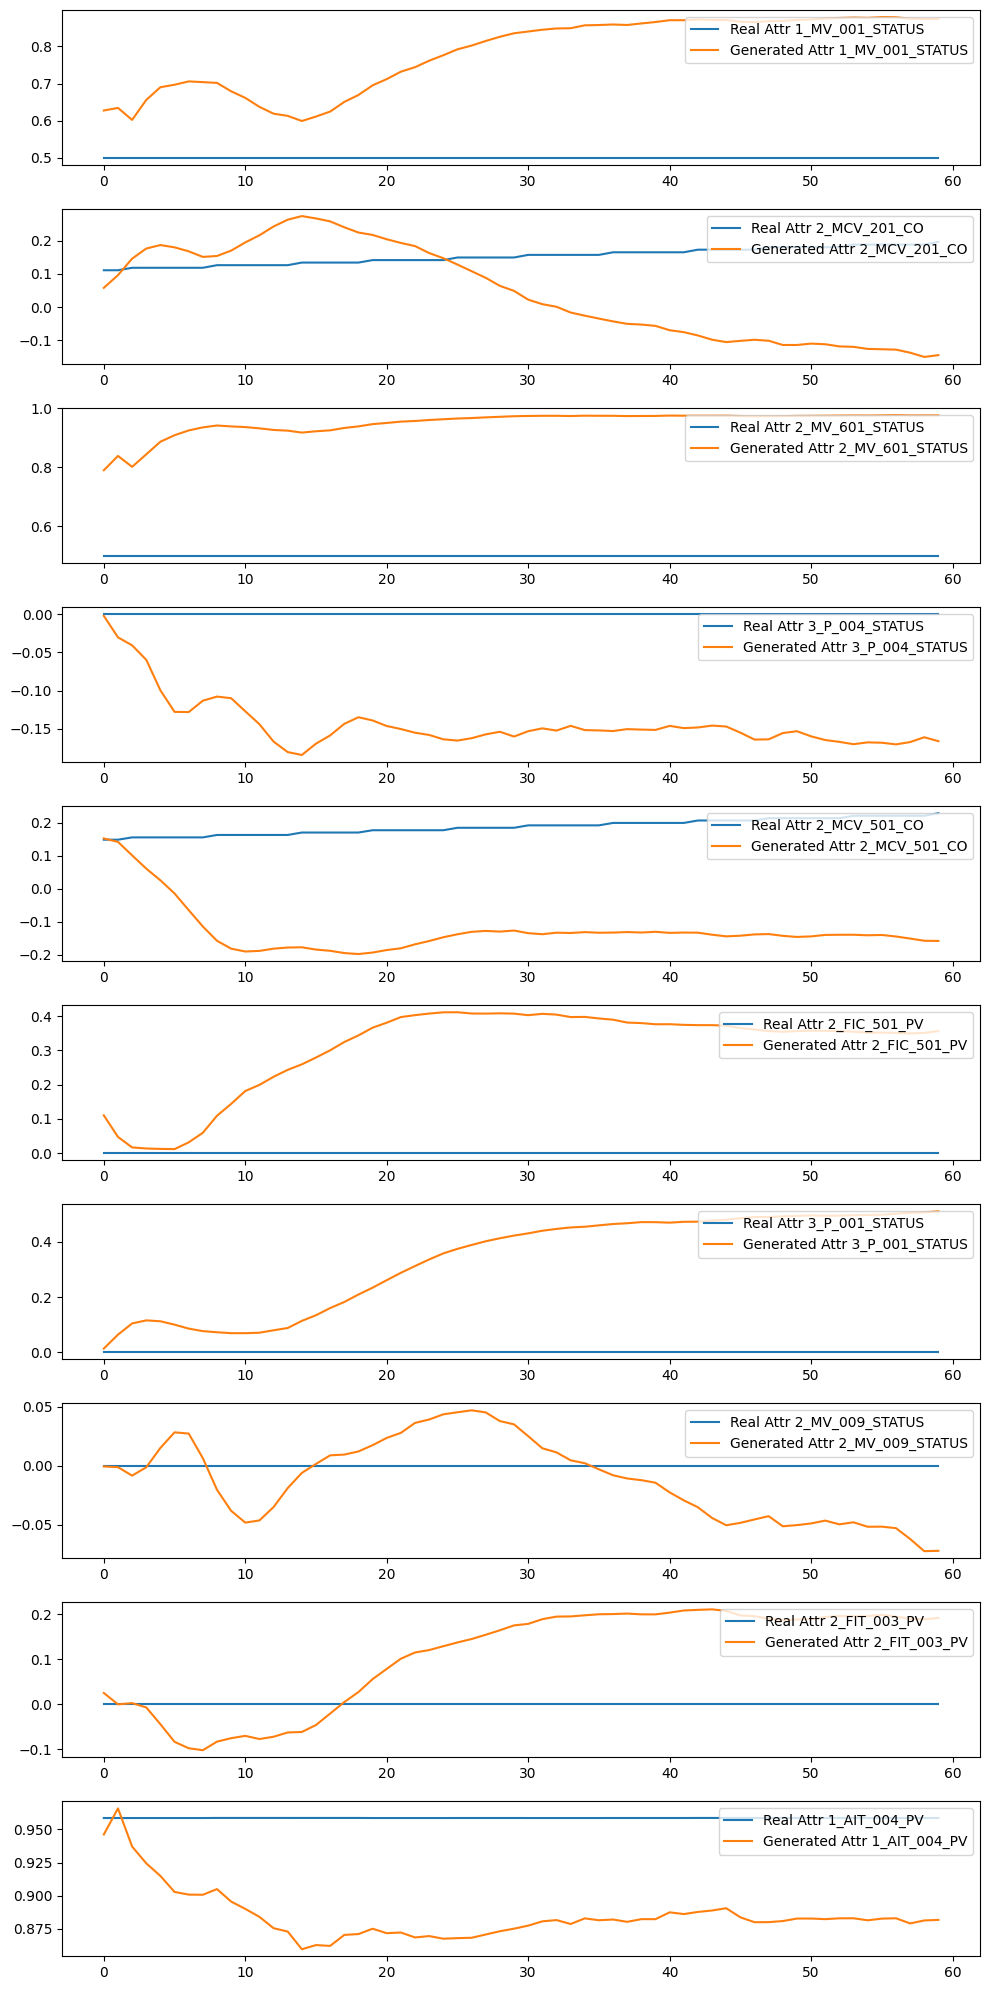

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8072 - disc_loss: 0.8700 - gen_loss: 2.1996
Epoch 41/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8392 - disc_loss: 0.7932 - gen_loss: 1.9692
Epoch 42/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8602 - disc_loss: 0.6978 - gen_loss: 1.9691
Epoch 43/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8233 - disc_loss: 0.8270 - gen_loss: 2.0567
Epoch 44/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8300 - disc_loss: 0.7864 - gen_loss: 2.0754
Epoch 45/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8335 - disc_loss: 0.7662 - gen_loss: 2.1263
Epoch 46/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8111 - disc_loss: 0.8525 - gen_loss: 1.8365
Epoch 47/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8176 - disc_loss: 0.8561 - gen_loss: 2.0703
Epoch 48/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8326 - disc_loss: 0.7867 - gen_loss: 2.

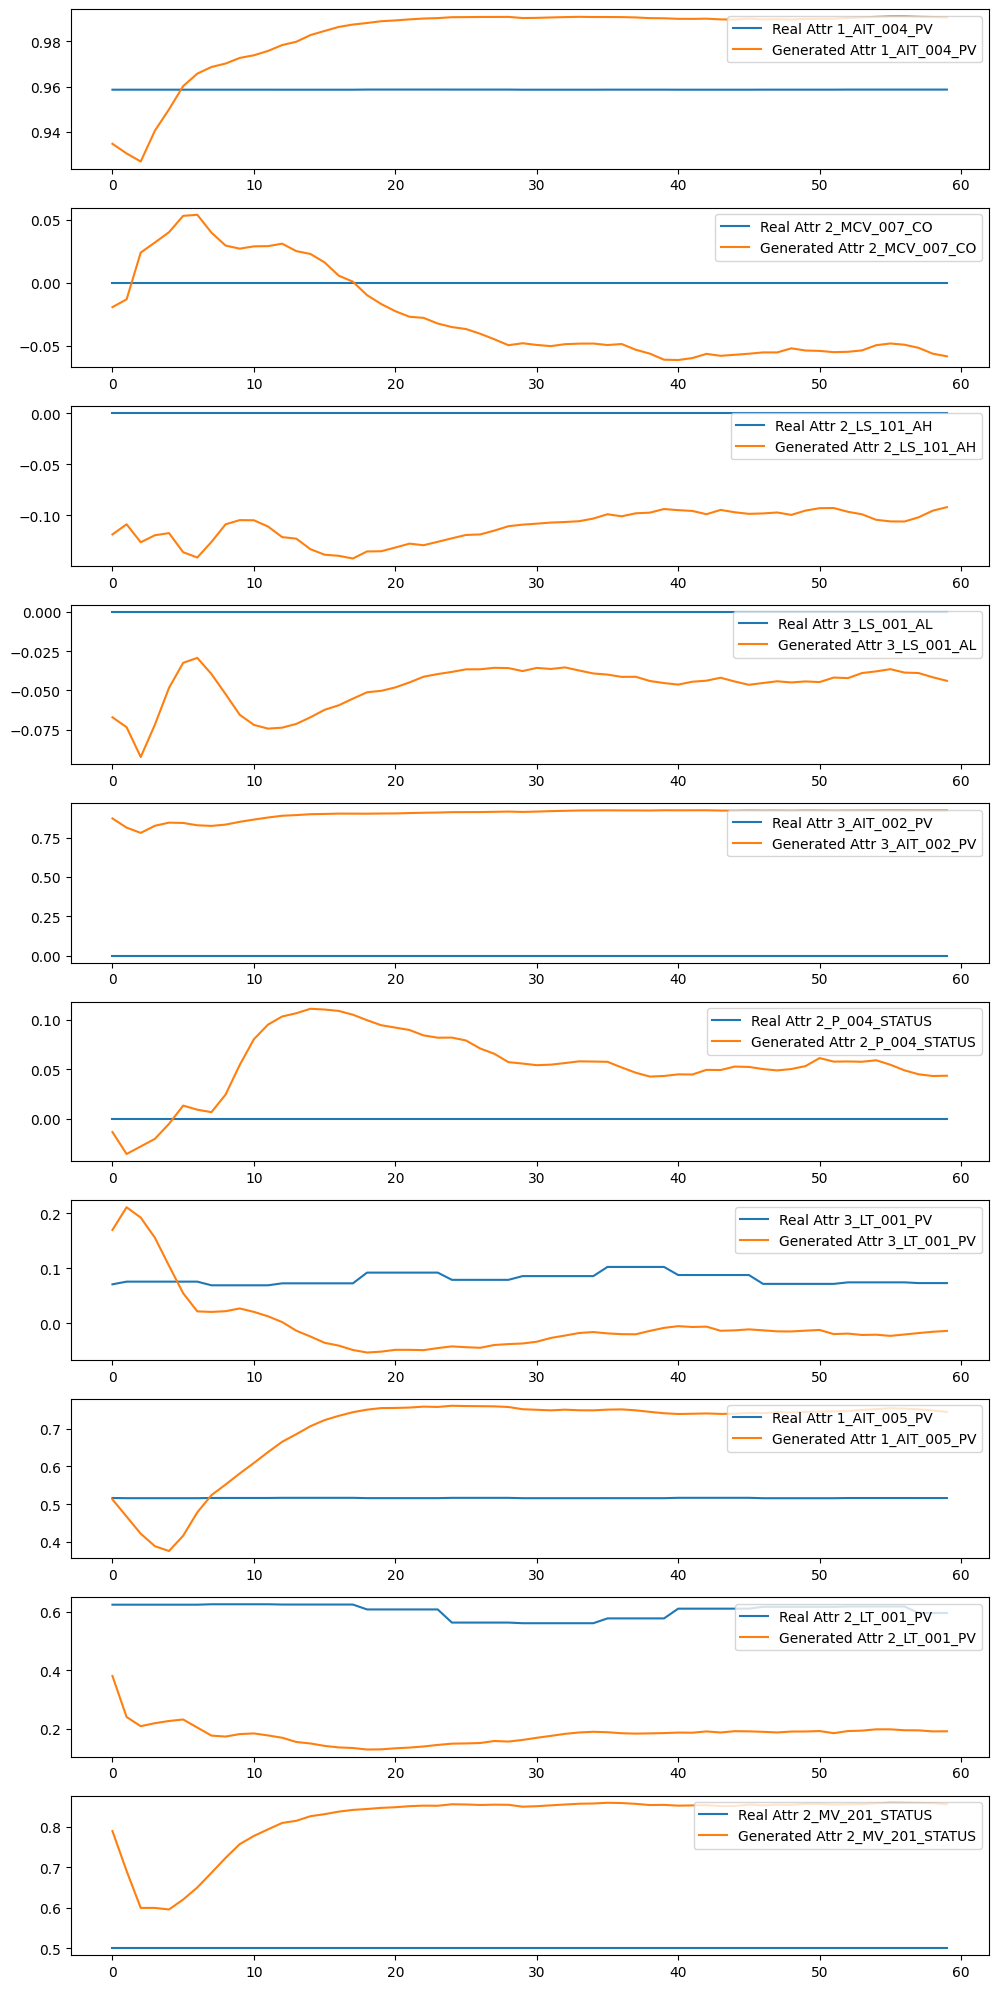

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7872 - disc_loss: 0.9565 - gen_loss: 1.8649
Epoch 51/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8965 - disc_loss: 0.5318 - gen_loss: 2.3429
Epoch 52/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9492 - disc_loss: 0.2573 - gen_loss: 3.4056
Epoch 53/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8050 - disc_loss: 0.8838 - gen_loss: 2.0769
Epoch 54/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7821 - disc_loss: 0.9231 - gen_loss: 1.8293
Epoch 55/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8128 - disc_loss: 0.8504 - gen_loss: 1.8098
Epoch 56/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7952 - disc_loss: 0.8758 - gen_loss: 1.7906
Epoch 57/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8190 - disc_loss: 0.8156 - gen_loss: 1.7676
Epoch 58/60
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8125 - disc_loss: 0.8518 - gen_loss: 1.

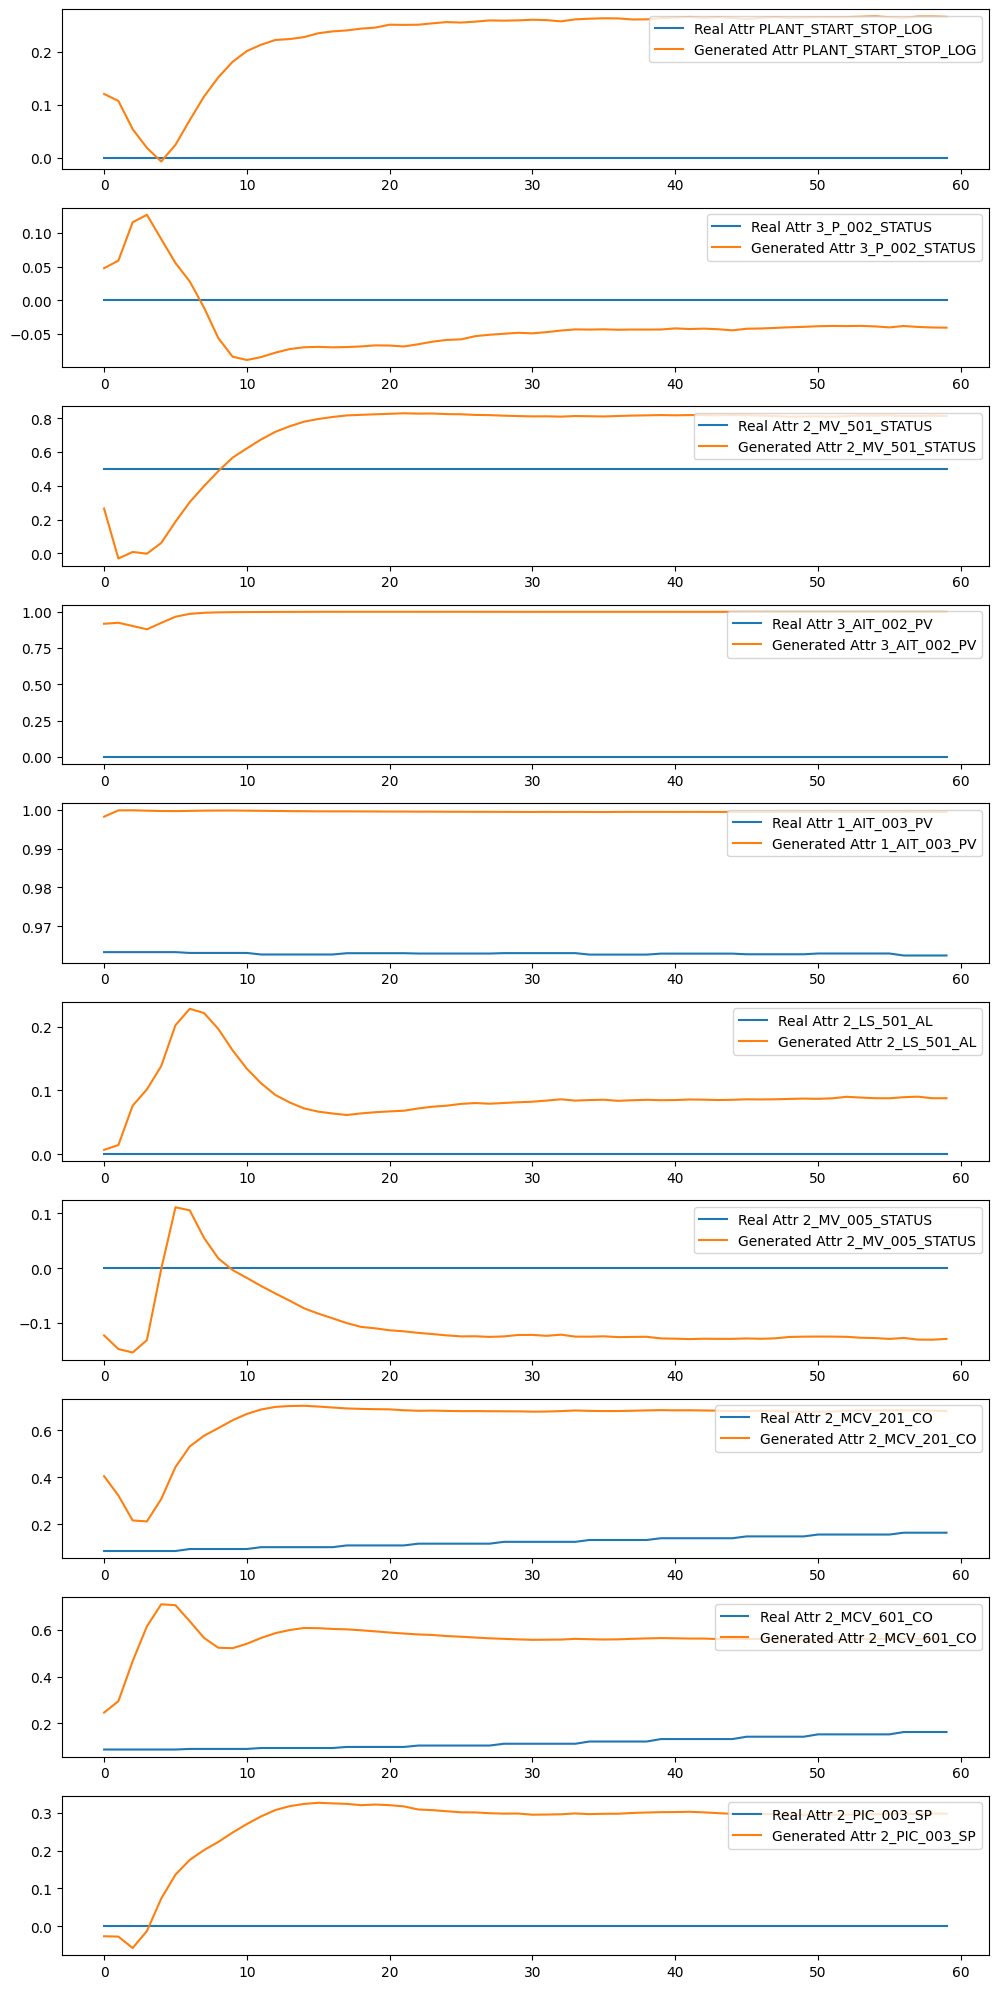

154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8104 - disc_loss: 0.8242 - gen_loss: 1.7502


In [97]:
tf.keras.backend.clear_session()
madgan.fit(train_data, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[visualization])

In [221]:
save_weights_model(madgan, '/kaggle/working/')

In [222]:
def optimize_latent(generator, x_real, latent_dim, steps=500, lr=1e-2):

    batch_size, seq_len, _ = x_real.shape
    z_var = tf.Variable(tf.random.normal([batch_size, seq_len, latent_dim]))

    optimizer = tf.keras.optimizers.Adam(lr)
    for step in range(steps):
        with tf.GradientTape() as tape:
            x_reconstructed = generator(z_var, training=False)
            loss = tf.reduce_mean(tf.abs(x_real - x_reconstructed))  # L1 loss

        grads = tape.gradient(loss, [z_var])
        optimizer.apply_gradients(zip(grads, [z_var]))

    return generator(z_var, training=False)

In [223]:
def mix_rbf_kernel(X, Y, sigmas, wts=None):
    X = tf.cast(X, dtype=tf.float64)
    Y = tf.cast(Y, dtype=tf.float64)
    sigmas = tf.cast(sigmas, dtype=tf.float64)
    
    if wts is None:
        wts = tf.ones(tf.shape(sigmas)[0], dtype=tf.float64)

    if len(X.shape) == 2:
        XX = tf.matmul(X, X, transpose_b=True)
        XY = tf.matmul(X, Y, transpose_b=True)
        YY = tf.matmul(Y, Y, transpose_b=True)
    elif len(X.shape) == 3:
        XX = tf.tensordot(X, X, axes=[[1, 2], [1, 2]])
        XY = tf.tensordot(X, Y, axes=[[1, 2], [1, 2]])
        YY = tf.tensordot(Y, Y, axes=[[1, 2], [1, 2]])
    else:
        raise ValueError("Unsupported shape for X")

    X_sq = tf.linalg.diag_part(XX)
    Y_sq = tf.linalg.diag_part(YY)

    r = lambda x: tf.expand_dims(x, 0)
    c = lambda x: tf.expand_dims(x, 1)

    K_XX, K_XY, K_YY = 0.0, 0.0, 0.0
    for i in range(sigmas.shape[0]):
        sigma = sigmas[i]
        wt = wts[i]
        gamma = 1.0 / (2.0 * sigma ** 2)
        K_XX += wt * tf.exp(-gamma * (-2 * XX + c(X_sq) + r(X_sq)))
        K_XY += wt * tf.exp(-gamma * (-2 * XY + c(X_sq) + r(Y_sq)))
        K_YY += wt * tf.exp(-gamma * (-2 * YY + c(Y_sq) + r(Y_sq)))

    return K_XX, K_XY, K_YY, tf.reduce_sum(wts)

def median_pairwise_distance_o(X, Y=None):
    
    if Y is None:
        Y = X  # this is horrendously inefficient, sorry

    if len(X.shape) == 2:
        # matrix
        X_sqnorms = np.einsum('...i,...i', X, X)
        Y_sqnorms = np.einsum('...i,...i', Y, Y)
        XY = np.einsum('ia,ja', X, Y)
    elif len(X.shape) == 3:
        # tensor -- this is computing the Frobenius norm
        X_sqnorms = np.einsum('...ij,...ij', X, X)  # reduce the tensor shape
        Y_sqnorms = np.einsum('...ij,...ij', Y, Y)
        XY = np.einsum('iab,jab', X, Y)  # X*Y^T??
    else:
        raise ValueError(X)

    distances = np.sqrt(X_sqnorms.reshape(-1, 1) - 2 * XY + Y_sqnorms.reshape(1, -1))
    distances = distances.reshape(-1, 1)
    distances = distances[~np.isnan(distances)]
    return np.median(distances)

def invert(generator, settings, samples, e_tolerance=0.1, n_iter=None, max_iter=10000, heuristic_sigma=None):

    samples = tf.convert_to_tensor(samples, dtype=tf.float64)

    Z = tf.Variable(tf.random.normal([samples.shape[0], settings['seq_length'], settings['latent_dim']]), trainable=True)

    def compute_loss():
        G_samples = generator(Z)
        reshaped_samples = tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']])
        Kxx, Kxy, Kyy, wts = mix_rbf_kernel(G_samples, reshaped_samples,
                                            sigmas=tf.constant([heuristic_sigma], dtype=tf.float32))
        similarity_per_sample = tf.linalg.diag_part(Kxy)
        loss = 1 - tf.reduce_mean(similarity_per_sample)
        return loss, similarity_per_sample

    if heuristic_sigma is None:
        heuristic_sigma = median_pairwise_distance_o(samples) * 10
        print("heuristic_sigma:", heuristic_sigma)

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)

    for i in range(max_iter if n_iter is None else n_iter):
        with tf.GradientTape() as tape:
            loss, loss_per_sample = compute_loss()
            # print(generator(Z).shape)
            # print(samples.shape)
            # print(generator(Z))
            # print(samples)
            # loss = tf.reduce_mean(tf.abs(tf.cast(generator(Z), dtype=tf.float64)-tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']]))) * 1000
        grads = tape.gradient(loss, [Z])
        optimizer.apply_gradients(zip(grads, [Z]))
        if i%100==0:
            grad_norm = tf.norm(grads[0]).numpy()
            print(f"Iteration {i+1}: Loss = {loss.numpy():.6f}, Grad Norm = {grad_norm:.6f}, MAE = {tf.reduce_mean(tf.abs(tf.cast(generator(Z), dtype=tf.float64)-tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']])))}")
        if n_iter is None and loss < e_tolerance:
            break

    G_samples_final = generator(Z)
    
    # return G_samples_final.numpy(), Z.numpy(), loss_per_sample.numpy(), heuristic_sigma
    return G_samples_final.numpy(), Z.numpy(), heuristic_sigma

In [224]:
BATCH_SIZE = 512
attack_ds = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(attack_windows)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [225]:
latent_vectors = tf.zeros((0, WINDOW_SIZE, LATENT_DIM))
for data in tqdm(attack_ds):
    # generated, latent, sigma = invert(
    #     generator=madgan.generator, 
    #     settings={'batch_size':BATCH_SIZE, 'latent_dim':LATENT_DIM, 'seq_length':WINDOW_SIZE, 'num_generated_features':len(train_cols)},
    #     samples=data, 
    #     e_tolerance=0.1, 
    #     n_iter=1000, 
    #     max_iter=10000, 
    #     heuristic_sigma=None
    # )
    latent = tf.random.normal((data.shape[0], WINDOW_SIZE, LATENT_DIM))
    latent_vectors = tf.concat([latent_vectors, latent], axis=0)

100%|██████████| 34/34 [00:01<00:00, 30.84it/s]


In [226]:
# print(generated.shape)
print(latent_vectors.shape)

(17275, 60, 30)


(60, 30, 1)
(60, 122)
(60, 122)
tf.Tensor(0.11115496, shape=(), dtype=float32)


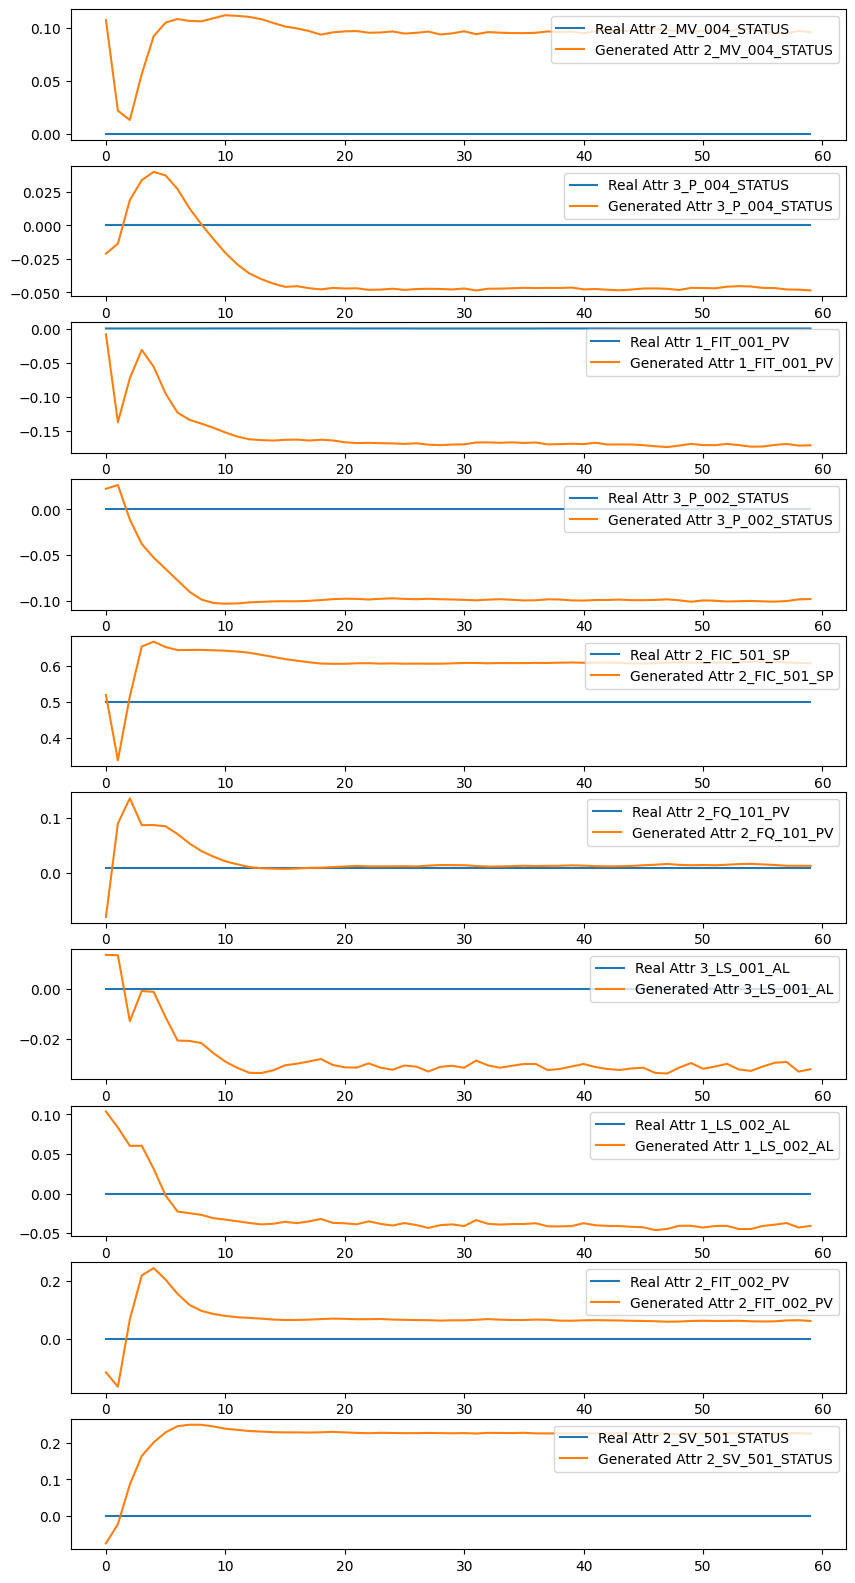

In [227]:
import matplotlib.pyplot as plt

random_idx = np.random.randint(15000, latent_vectors.shape[0])
generated = madgan.generator(tf.expand_dims(latent_vectors[random_idx], axis=0), training=False)[0]
sample_to_invert = attack_windows[random_idx]
print(tf.expand_dims(latent_vectors[random_idx], axis=-1).shape)
print(generated.shape)
print(sample_to_invert.shape)
print(tf.reduce_mean(tf.abs(sample_to_invert-generated)))

fig, ax = plt.subplots(10, 1, figsize=(10, 20))

time = np.arange(WINDOW_SIZE)
random_attr = np.random.choice([i for i in range (len(train_cols))], size=10, replace=False)
# Plot data on each subplot
for i in range (10):
    ax[i].plot(time, sample_to_invert[:, random_attr[i]], label=f"Real Attr {train_cols[random_attr[i]]}")
    ax[i].plot(time, generated[:, random_attr[i]], label=f"Generated Attr {train_cols[random_attr[i]]}")
    ax[i].legend(loc='upper right')

In [228]:
def compute_DR_score(generator, discriminator, x_real, z, lambda_weight=0.5):
    if len(z.shape) < 3:
        z = tf.expand_dims(z, axis=0)
    if len(x_real.shape) < 3:
        x_real = tf.expand_dims(x_real, axis=0)
    
    z = tf.cast(z, dtype=tf.float64)
    x_real = tf.cast(x_real, dtype=tf.float64)
    
    x_recon = generator(z, training=False)
    x_recon = tf.cast(x_recon, dtype=tf.float64)
    recon_loss = tf.reduce_mean(tf.abs(x_recon - x_real), axis=[1,2])

    disc_output = discriminator(x_real, training=False)
    disc_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(disc_output), disc_output)
    # print(disc_loss.shape)
    # disc_loss = tf.reshape(disc_loss, [-1])

    recon_loss = tf.cast(recon_loss, dtype=tf.float64)
    disc_loss = tf.cast(disc_loss, dtype=tf.float64)
    # print(recon_loss.shape)
    # print(disc_loss.shape)

    dr_score = lambda_weight * recon_loss + (1 - lambda_weight) * disc_loss
    return dr_score

In [229]:
paired_ds = tf.data.Dataset.from_tensor_slices((attack_windows, latent_vectors)).batch(BATCH_SIZE)

In [230]:
random_idx = np.random.randint(0, attack_windows.shape[0])
compute_DR_score(madgan.generator, madgan.discriminator, attack_windows[random_idx], latent_vectors[random_idx])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.7531026])>

In [231]:
dr_scores = tf.zeros((0,), dtype=tf.float64)
LAMBDA = 0.5

for pair in paired_ds:
    attack_window, latent_vector = pair
    # print(attack_window.shape)
    dr_score = compute_DR_score(madgan.generator, madgan.discriminator, attack_window, latent_vector, LAMBDA)
    # print(dr_score.shape)
    # print(dr_scores.shape)
    dr_scores = tf.concat([dr_scores, dr_score], axis=0)

In [232]:
dr_scores

<tf.Tensor: shape=(17275,), dtype=float64, numpy=
array([0.1786986 , 0.08371395, 0.14427802, ..., 1.07474714, 0.75946447,
       1.36264215])>

In [233]:
def map_window_scores_to_timestamps(dr_scores, n_timestamps, window_length, step_size):
    """
    Maps window-level DR scores to timestamp-level scores by averaging.
    
    Args:
    - dr_scores (np.array): shape (n_windows,)
    - n_timestamps (int): length of the original time series
    - window_length (int): size of each window
    - step_size (int): stride between windows

    Returns:
    - dr_scores_mapped (np.array): shape (n_timestamps,), average DR score per timestamp
    """
    dr_scores_mapped = np.zeros(n_timestamps)
    counts = np.zeros(n_timestamps)

    for i, score in enumerate(dr_scores):
        start = i * step_size
        end = start + window_length
        if end > n_timestamps:
            break  # Skip incomplete windows at the end
        dr_scores_mapped[start:end] += score
        counts[start:end] += 1

    # Avoid divide-by-zero
    nonzero = counts > 0
    dr_scores_mapped[nonzero] /= counts[nonzero]
    
    return dr_scores_mapped

In [234]:
anomaly_score = map_window_scores_to_timestamps(dr_scores, attack_df.shape[0], WINDOW_SIZE, WINDOW_STEP)

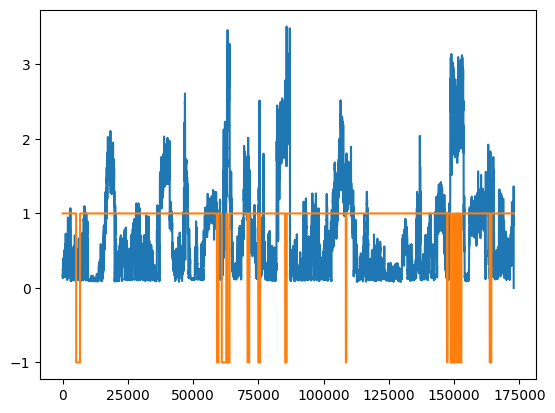

In [235]:
plt.plot(anomaly_score)
plt.plot(label)

In [236]:
y_true = np.array(list(map(lambda x: 0 if x==1 else 1, label)))

In [251]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = []
TAO = 1.75

for num in anomaly_score:
    if num > TAO:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    162824
           1       0.31      0.41      0.35      9977

    accuracy                           0.91    172801
   macro avg       0.64      0.68      0.65    172801
weighted avg       0.93      0.91      0.92    172801



In [ ]:
y_scores = (anomaly_score-min(anomaly_score))/(max(anomaly_score)-min(anomaly_score))

Accuracy	 0.9123095352457451
Precision	 0.30686567164179107
Recall	 0.412147940262604
f1 score	 0.3517987765752663
cohen_kappa_score	 0.3058523663854392
auc	 0.7218099980936354
roc_auc	 0.7218099980936354


Text(0.5, 23.52222222222222, 'Ground Truth')

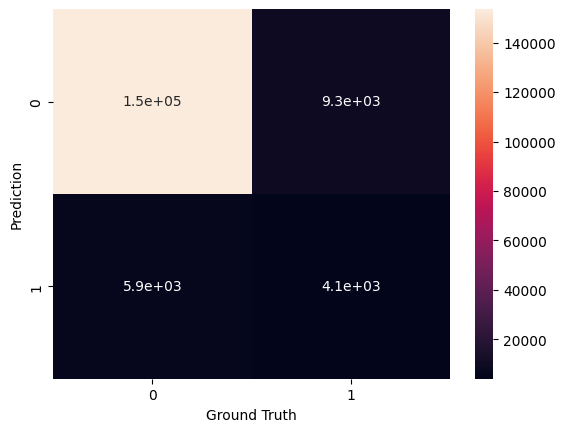

In [253]:
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall)/ (precision + recall)
cohen_kappa_score = cohen_kappa_score(y_true, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_scores)
auc_val = auc(false_positive_rate, true_positive_rate)
roc_auc_val = roc_auc_score(y_true, y_scores)

print('Accuracy\t', accuracy)
print('Precision\t', precision)
print('Recall\t', recall)
print('f1 score\t', f1_score)
print('cohen_kappa_score\t', cohen_kappa_score)
print('auc\t', auc_val)
print('roc_auc\t', roc_auc_val)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
plt.ylabel('Prediction')
plt.xlabel('Ground Truth')

In [254]:
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    auc,
    average_precision_score
)

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = average_precision_score(y_true, y_scores)
print(f"PR-AUC: {pr_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

PR-AUC: 0.2380
ROC-AUC: 0.7218


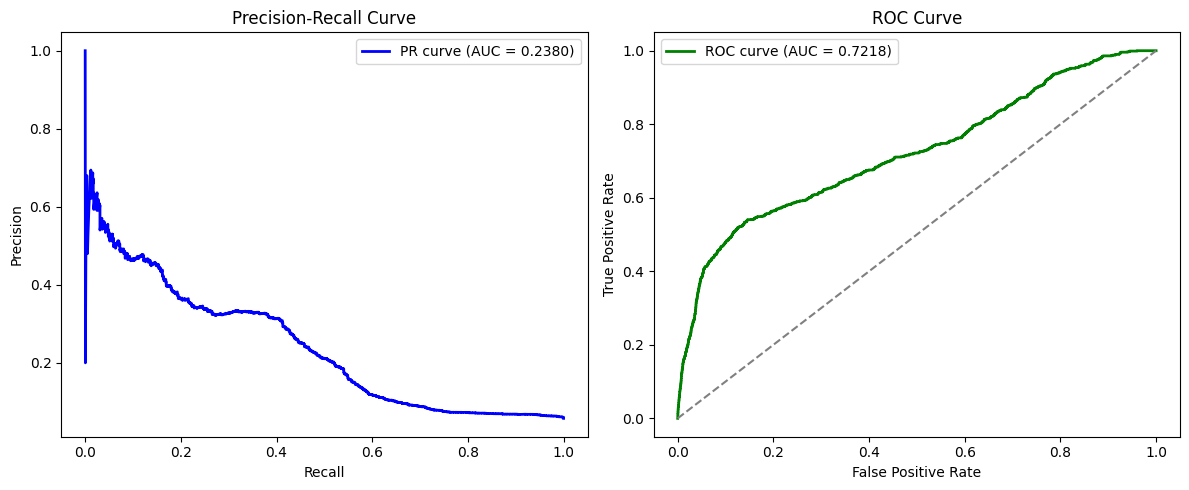

In [255]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()